In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

In [221]:
labels = pd.read_csv('train_labels.csv')
values = pd.read_csv('train_values.csv',
                    usecols=['building_id', 
                            'geo_level_1_id', 'geo_level_2_id',
                            'foundation_type', 
                            'has_superstructure_mud_mortar_stone'])
values = values.merge(labels)

Text(0, 0.5, 'Cantidad de edificaciones')

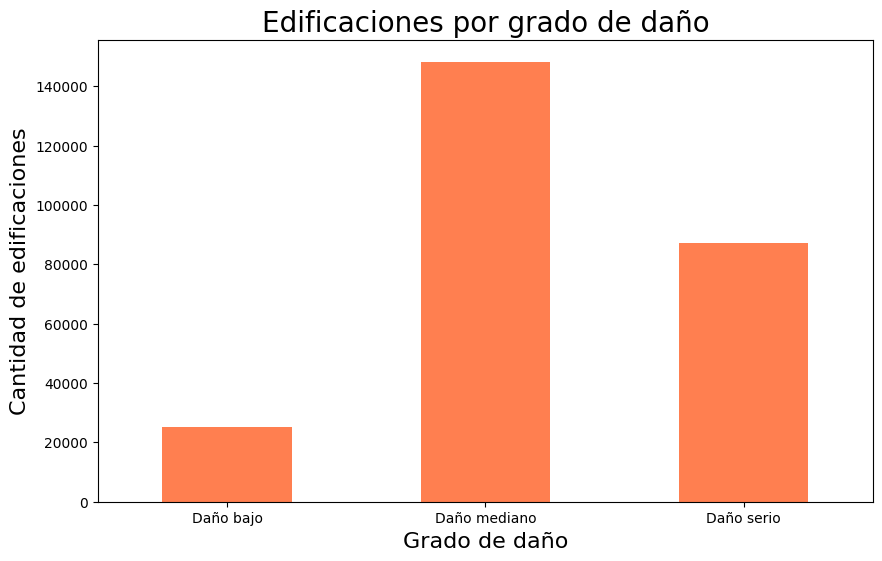

In [222]:
damage_grade_counts = values.damage_grade.value_counts()
# Ordeno y renombro los damage grades
damage_grade_counts = damage_grade_counts[[1, 2, 3]]
damage_grade_counts = damage_grade_counts.rename({1:'Daño bajo',
                                                  2:'Daño mediano',
                                                 3: 'Daño serio'})
g = damage_grade_counts.plot(kind='bar', linewidth=150, 
                         color='coral',figsize=(10,6), rot=0)
g.set_title('Edificaciones por grado de daño', fontsize=20)
g.set_xlabel('Grado de daño', fontsize=16)
g.set_ylabel('Cantidad de edificaciones', fontsize=16)

Text(220.72222222222223, 0.5, 'id de la region geográfica nivel 2 (agrupado)')

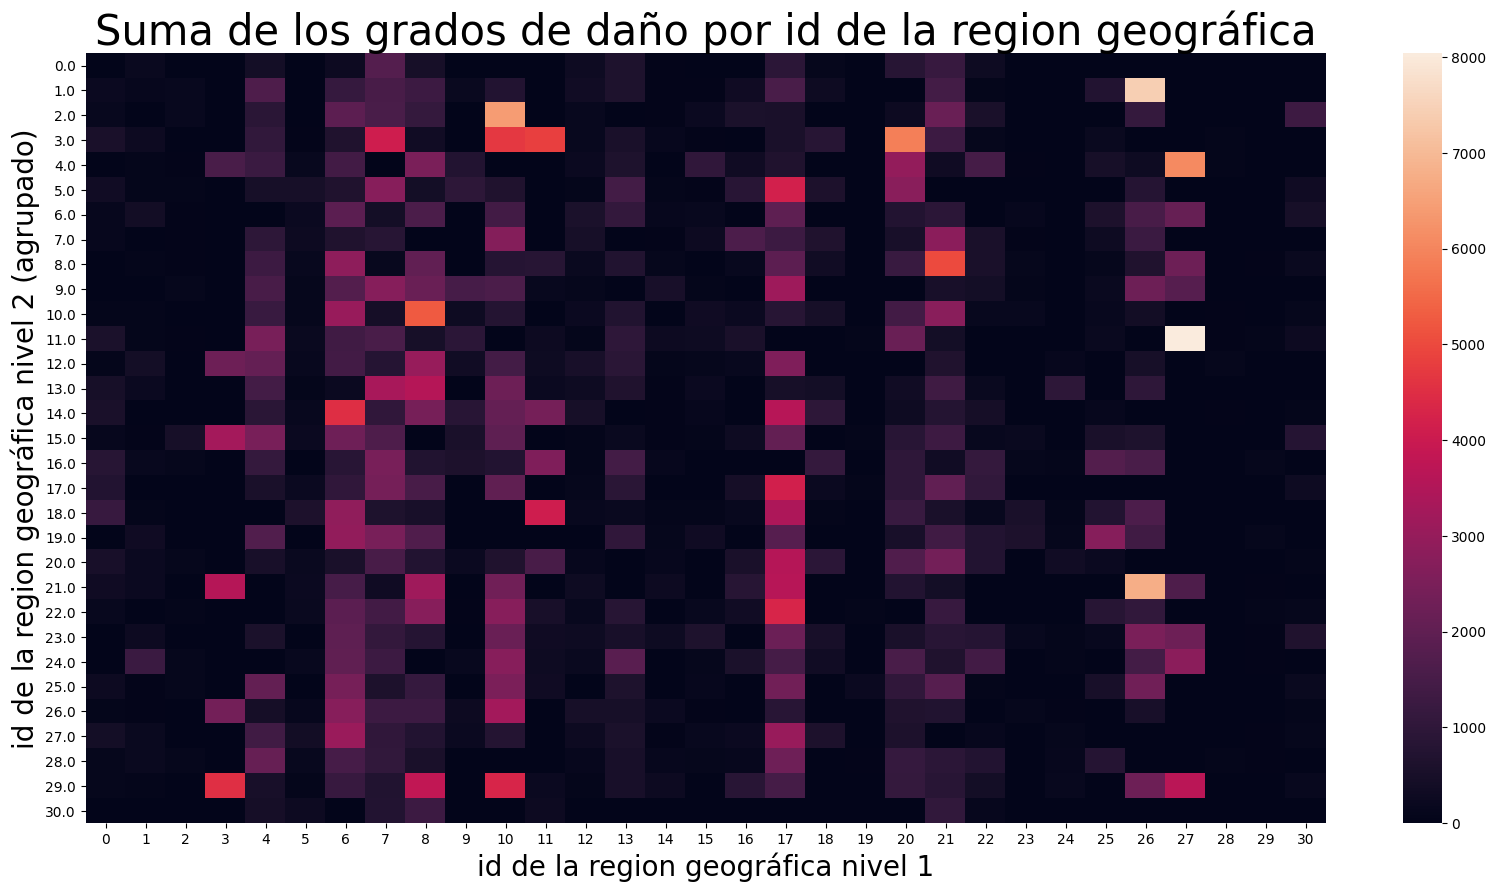

In [223]:
# Agrupo los valores de geo_level_2_id en 30 para que el grafico
# quede mas prolijo
values['geo_level_2_id_agrupados'] = round(values.geo_level_2_id / 48)
for_heatmap = values.pivot_table(index='geo_level_2_id_agrupados', 
                                 columns='geo_level_1_id', 
                                 values='damage_grade',
                                 aggfunc='sum')
for_heatmap = for_heatmap.fillna(0)
g = sns.heatmap(for_heatmap)
g.set_title("Suma de los grados de daño por id de la region geográfica",
            fontsize=30)
g.set_xlabel("id de la region geográfica nivel 1",fontsize=20)
g.set_ylabel("id de la region geográfica nivel 2 (agrupado)", fontsize=20)

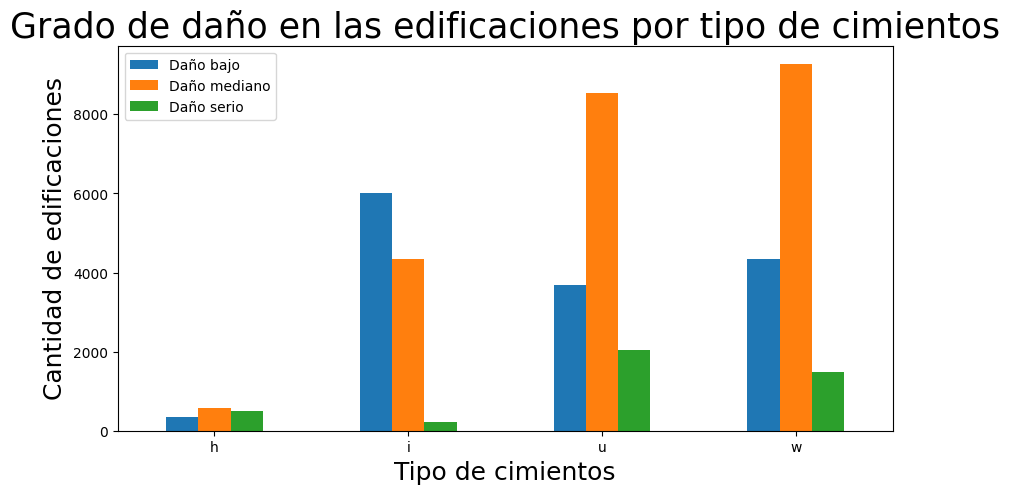

In [228]:
a = values[['damage_grade', 'foundation_type', 'geo_level_1_id']]
a = a.groupby(['damage_grade', 'foundation_type']).count()
a = a.unstack(0)
# Separo el tipo de cimiento r porque tiene una escala muy distinta a 
# las de los demas
g = a.loc[['h', 'i', 'u', 'w'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

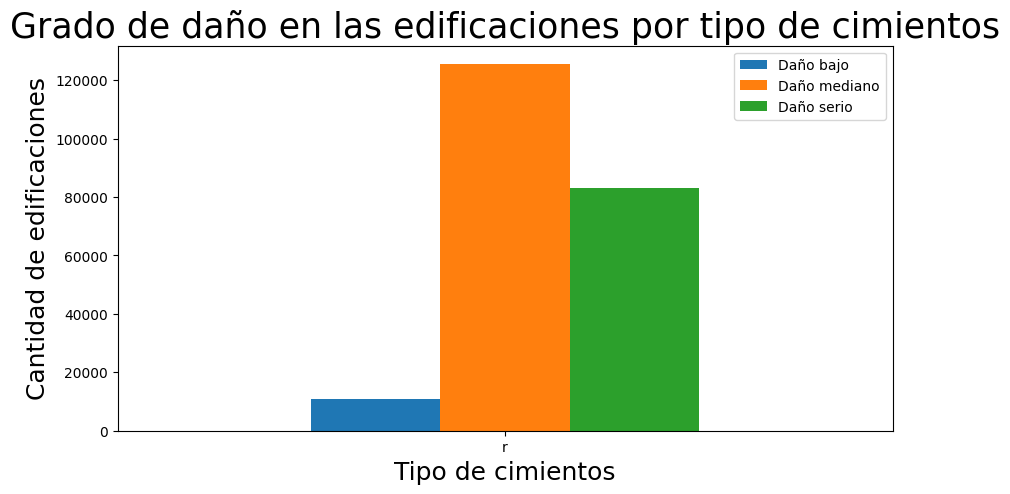

In [229]:
g = a.loc[['r'],:].plot.bar(figsize=(10,5), rot=0)
g.set_title("Grado de daño en las edificaciones por tipo de cimientos",
            fontsize=25)
g.set_xlabel("Tipo de cimientos",fontsize=18)
g.set_ylabel("Cantidad de edificaciones", fontsize=18)
plt.legend(['Daño bajo','Daño mediano','Daño serio'])

Concluciones los 2 graficos de arriba:
El tipo de fundacion 'i' es el unico que tiene una mayor cantidad de edificaciones con bajo daño que con los otros grados de daño. En los demas tipos de fundacion predomina el daño medio, que, como puede verse en el grafico de edificaciones por grado de daño, es el que predomina en general. Tambien, hay proporcionalmente muchas menos edificaciones de este tipo que recibieron daño serio. En este sentido, se puede decir que el tipo de fundacion 'i' tendio a ser el mas efectivo para mitigar el daño.

Ademas se puede ver que los tipos de fundacion 'u' y 'w' tienen distribuciones similares de los grados de daño, por lo que se puede decir que sus efectividades para mitigar el daño son similares